In [349]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set pandas to display all rows permanently
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')


# load data

In [350]:
# load data
data = pd.read_csv('weather_forecast_data.csv')
print(data)

      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1       27.112464  84.183705   13.289986    10.375646  1035.430870  no rain
2       20.433329  42.290424    7.216295     6.673307  1033.628086  no rain
3       19.576659  40.679280    4.568833    55.026758  1038.832300  no rain
4       19.828060  93.353211    0.104489    30.687566  1009.423717  no rain
...           ...        ...         ...          ...          ...      ...
2495    14.684023  82.054139    8.751728    58.939058  1003.418337     rain
2496    20.754521  92.099534   17.305508    70.889921  1049.801435     rain
2497    22.087516  71.530065    0.857918    84.162554  1039.664865     rain
2498    18.542453  97.451961    5.429309    54.643893  1014.769130     rain
2499    23.720338  89.592641    7.335604    50.501694  1032.378759     rain

[2500 rows x 6 columns]


# check if dataset contain any missing data

In [351]:
# the number of missing values in each column
print(data.isnull().sum())

Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64


# handle missing data, dropping rows with missing values

In [352]:
# Drop rows where any value is missing
# data = data.dropna()
# print(data)

# handle missing data , replacing them with the average of the feature.

In [353]:
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())
data['Humidity'] = data['Humidity'].fillna(data['Humidity'].mean())
data['Wind_Speed'] = data['Wind_Speed'].fillna(data['Wind_Speed'].mean())
data['Cloud_Cover'] = data['Cloud_Cover'].fillna(data['Cloud_Cover'].mean())
data['Pressure'] = data['Pressure'].fillna(data['Pressure'].mean())
print(data)

      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1       27.112464  84.183705   13.289986    10.375646  1035.430870  no rain
2       20.433329  42.290424    7.216295     6.673307  1033.628086  no rain
3       19.576659  40.679280    4.568833    55.026758  1038.832300  no rain
4       19.828060  93.353211    0.104489    30.687566  1009.423717  no rain
...           ...        ...         ...          ...          ...      ...
2495    14.684023  82.054139    8.751728    58.939058  1003.418337     rain
2496    20.754521  92.099534   17.305508    70.889921  1049.801435     rain
2497    22.087516  71.530065    0.857918    84.162554  1039.664865     rain
2498    18.542453  97.451961    5.429309    54.643893  1014.769130     rain
2499    23.720338  89.592641    7.335604    50.501694  1032.378759     rain

[2500 rows x 6 columns]


In [354]:
print(data.isnull().sum())

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


# check if data have the same scale

In [355]:
# Summary statistics
print (data.describe())

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.573777    64.366909     9.911826    49.808770  1014.409327
std       7.295628    19.813325     5.743575    28.869772    20.072933
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.417898    47.493987     4.829795    24.817296   997.190281
50%      22.573777    64.366909     9.911826    49.808770  1014.095390
75%      28.934369    81.445049    14.889660    74.989410  1031.606187
max      34.995214    99.997481    19.999132    99.997795  1049.985593


# Splitting our data to training and testing

In [356]:
# Separate features -> X and target -> y
X = data.drop('Rain', axis=1)  # Features (drop the target column)
y = data['Rain']  # Target variable
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

# Scale data

In [357]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numeric columns only
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Convert the scaled data back to a DataFrame and keep original column names and index
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns , index=x_train.index)  # x_train.columns -> return list of columns name
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns , index=x_test.index)
print(x_train_scaled_df)
print()
print(x_test_scaled_df)

# KNN from scratch

In [358]:
def KNNFromScratch (k, x_train_df, y_train_df , x_test_df):  # x_test ->> dataframe contains 1 row
    features_names = x_train_df.columns.tolist()
    y_predict = []
    for index1, x_test in x_test_df.iterrows():
        distances = []
        for index2, row in x_train_df.iterrows():
            sum = 0
            for name in features_names :
                sum += pow(row[name] - x_test[name], 2)
            distances.append([math.sqrt(sum), index2])
        sorted_distances = sorted(distances, key=lambda x: x[0])
        target_values = []
        for item in sorted_distances[ : k] :
            target_values.append(y_train_df.loc[item[1]])
        ans = max(target_values, key=target_values.count)
        y_predict.append(ans)  
    return y_predict

y_predict_KNN_Scratch = KNNFromScratch(3, x_train_scaled_df, y_train, x_test_scaled_df)
print(y_predict_KNN_Scratch)

['no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain', 'rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'rain', 'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'no rain', 'rain', 'no rain', 'no rain', 'no rain', 'no rain', '

# KNN built in

In [359]:
def KNNBuiltIn(k, x_train_df, y_train_df , x_test_df):
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model
    knn.fit(x_train_df, y_train_df)
    # Predict on the test set
    y_pred = knn.predict(x_test_df)
    return y_pred

y_predict_KNN_Built_In = KNNBuiltIn(3, x_train_scaled_df, y_train, x_test_scaled_df)
print (y_predict_KNN_Built_In)

['no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'rain'
 'no rain' 'rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain' 'rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain'
 'no 

# KNN accuracy

In [360]:
accuracy_KNN_Scratch = accuracy_score(y_test.values.tolist(), y_predict_KNN_Scratch)
accuracy_KNN_Built_In = accuracy_score(y_test.values.tolist(), y_predict_KNN_Built_In.tolist())
print('accuracy_KNN_Scratch: ', accuracy_KNN_Scratch)
print('accuracy_KNN_Built_In: ', accuracy_KNN_Built_In)
print()
precision_KNN_Scratch = precision_score(y_test.values.tolist(), y_predict_KNN_Scratch, pos_label='rain') # pos_label parameter to match your positive class:
precision_KNN_Built_In = precision_score(y_test.values.tolist(), y_predict_KNN_Built_In.tolist(), pos_label='rain')
print('precision_KNN_Scratch: ', precision_KNN_Scratch)
print('precision_KNN_Built_In: ', precision_KNN_Built_In)
print()
recall_KNN_Scratch = recall_score(y_test.values.tolist(), y_predict_KNN_Scratch, pos_label='rain') # pos_label parameter to match your positive class:
recall_KNN_Built_In = recall_score(y_test.values.tolist(), y_predict_KNN_Built_In.tolist(), pos_label='rain')
print('recall_KNN_Scratch: ', recall_KNN_Scratch)
print('recall_KNN_Built_In: ', recall_KNN_Built_In)


accuracy_KNN_Scratch:  0.968
accuracy_KNN_Built_In:  0.968

precision_KNN_Scratch:  0.8846153846153846
precision_KNN_Built_In:  0.8846153846153846

recall_KNN_Scratch:  0.8214285714285714
recall_KNN_Built_In:  0.8214285714285714


# Naive Bayes

In [361]:
def naive_bayes(x_train_df, y_train_df, x_test_df):
    # create naive bayes model
    naive_bayes_model = GaussianNB()
    # training
    naive_bayes_model.fit(x_train_df, y_train_df)
    # test
    y_predict = naive_bayes_model.predict(x_test_df)
    return y_predict

naive_bayse = naive_bayes(x_train_scaled_df, y_train, x_test_scaled_df)
print(naive_bayse)

['no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain'

# Decision Tree

In [362]:
def decision_tree(x_train_df, y_train_df, x_test_df):
     # create decision tree model
    decision_tree_model = DecisionTreeClassifier(random_state=42)
    # training
    decision_tree_model.fit(x_train_df, y_train_df)
    # test
    y_predict = decision_tree_model.predict(x_test_df)
    return y_predict

decision_tree = decision_tree(x_train_scaled_df, y_train, x_test_scaled_df)
print(decision_tree)

['no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'rain'
 'no rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'rain' 'rain' 'no rain' 'no rain' 'no rain' 'no rain' 'rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain' 'no rain'
 'no rain' 'r

In [363]:
accuracy_naive_bayes = accuracy_score(y_test.values.tolist(), naive_bayse.tolist())
accuracy_decision_tree = accuracy_score(y_test.values.tolist(), decision_tree.tolist())
print('accuracy_naive_bayes: ', accuracy_naive_bayes)
print('accuracy_decision_tree: ', accuracy_decision_tree)
print()
precision_naive_bayes = precision_score(y_test.values.tolist(), naive_bayse.tolist(), pos_label='rain') # pos_label parameter to match your positive class:
precision_decision_tree = precision_score(y_test.values.tolist(), decision_tree.tolist(), pos_label='rain')
print('precision_naive_bayes: ', precision_naive_bayes)
print('precision_decision_tree: ', precision_decision_tree)
print()
recall_naive_bayes = recall_score(y_test.values.tolist(), naive_bayse.tolist(), pos_label='rain') # pos_label parameter to match your positive class:
recall_decision_tree = recall_score(y_test.values.tolist(),  decision_tree.tolist(), pos_label='rain')
print('recall_naive_bayes: ', recall_naive_bayes)
print('recall_decision_tree: ', recall_decision_tree)

accuracy_naive_bayes:  0.964
accuracy_decision_tree:  0.99

precision_naive_bayes:  1.0
precision_decision_tree:  0.9636363636363636

recall_naive_bayes:  0.6785714285714286
recall_decision_tree:  0.9464285714285714


# plotting decision tree

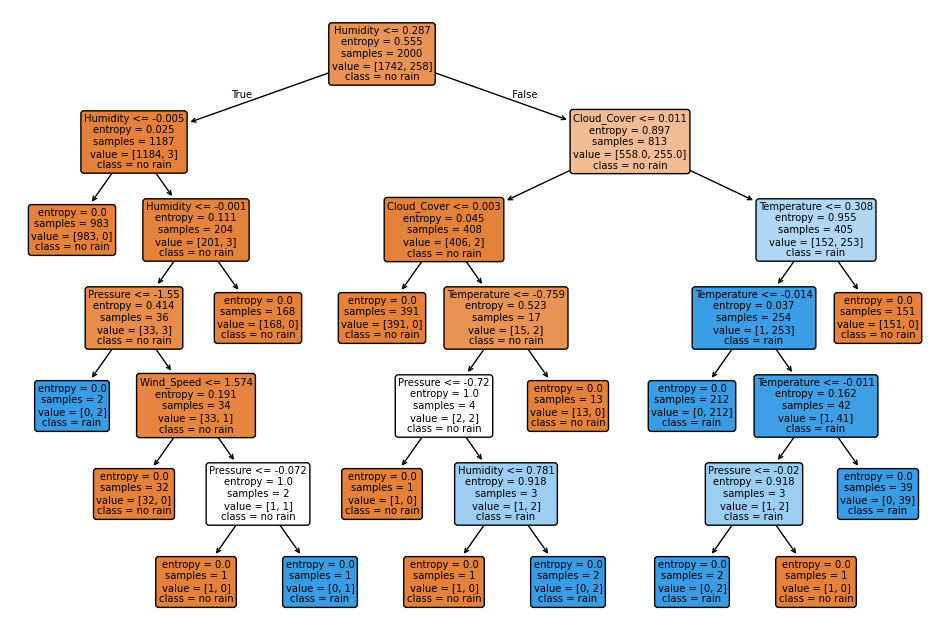

In [365]:

decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
decision_tree_model.fit(x_train_scaled_df, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, 
          feature_names=x_train_scaled_df.columns, 
          class_names=y_train.unique().astype(str), 
          filled=True, 
          rounded=True)
plt.show()